In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [3]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['UniProtIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting UniProt IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2UniprotID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2UniprotID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)


Uniprot_Genesets = {
    'TCA cycle' : pd.DataFrame({'uniprot_id' : MitoPW.loc['TCA cycle','UniProtIDs'].split(',')})
}

,MitoPathway Hierarchy,Genes,PW level,UniProtIDs
MitoPathway,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"Q80VP5,Q14CH7,P0CB42,Q8K1C0,P28352,Q925I1,Q9DC..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"P28352,Q925I1,Q6ZQJ5,O08600,Q8C163,Q80ZH7,Q3U0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"Q6ZQJ5,Q8C163,Q80ZH7,Q9CXC3,Q3UG70,Q9QZM2,Q8BK..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"Q925I1,Q8CHZ9,B9EJ57,Q8BKY8,Q91VA6,Q3UG70,Q9QZ..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"P28352,Q8C163,Q80ZH7,O08760,Q8K409,Q3UG70,Q6P1..."
...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"P59017,O35465,Q9DB70,Q3KNM2,O55125,Q7TMG8,Q99L..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"P59017,O35465,Q9DB70,Q3KNM2,P97432,O55125,Q7TM..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"Q9Z0X1,Q8BUE4,Q3TY86,Q61337,O08734,Q07813,Q99M..."


In [4]:
PT = pd.read_csv(f'{Project}/Results/Other_papers/Martinez_etal.2023.Cell_Metabolism/Tables/Proteome/PT_Exp_calc/v20240416/Martinez_PT_rel-log2Exp_mito.tsv', sep='\t')
display(PT)

,uniprot_id,Brown_a,Brown_b,Brown_c,Brown_d,Brown_e,White_a,White_b,White_c,White_d,White_e,Beige_a,Beige_b,Beige_c,Beige_d,Beige_e
0,Q9D0M3,4.310670,4.352932,4.423585,4.258712,4.403632,3.782268,3.751328,3.608698,3.499941,3.481348,4.789060,4.769008,4.801047,4.701320,4.687927
1,P35486,3.912923,4.111947,3.839142,3.856424,3.892590,3.094930,3.438655,3.059101,3.074876,3.069996,4.185937,4.224247,4.257839,4.253711,4.358171
2,Q9D3D9,3.785237,2.888494,3.197088,3.149086,4.097529,2.332061,2.717761,2.214549,3.345299,3.786711,3.680311,4.078798,3.566457,3.926085,2.734553
3,Q9DCB8,0.123346,-1.178836,0.006022,0.079648,0.503233,-1.762824,-1.690151,-2.024125,-0.814742,-0.934005,-0.193664,0.609609,0.525352,0.312597,-0.903732
4,Q9D051,4.548993,4.543251,4.355349,4.472349,4.622394,3.534566,3.824371,3.580472,3.631412,3.542128,4.508177,4.901392,4.815826,4.885781,4.825455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,P70677,-0.472635,-0.306508,-0.427216,-0.501799,-0.371735,0.518331,0.696188,0.755109,0.750342,0.633092,-1.099766,-1.167032,-1.179478,-1.145676,-1.138932
696,Q61337,-1.232967,-2.284589,-0.895268,-0.873345,-0.760831,-1.522141,-1.608262,-1.511095,0.456074,0.168601,-1.396997,-0.902399,-0.706457,-0.931076,-2.573982
697,Q9D3P8,0.408465,0.290550,0.597801,0.545386,0.304324,1.031155,1.235701,1.154900,1.291084,1.283808,-0.337952,-0.300447,-0.390166,-0.299611,-0.587389
698,Q8BHS6,-2.520494,-2.609905,-2.786344,-2.806172,-2.672248,-0.326294,-0.252266,-0.160523,-0.323827,-0.440414,-2.777700,-2.098955,-2.346304,-2.158222,-1.973030


In [5]:
def strip_plot(x, y, width, s, c, lw, ax, rasterized):
    ax.scatter(list( x + (np.random.rand(1,len(y))[0] -0.5) * width ), y, 
                s=s, c=c, lw=lw,
                rasterized = rasterized,
                zorder=-1)

---

In [6]:
Genesets = {
    'TCA cycle' : Uniprot_Genesets['TCA cycle'],
    'All mito' : PT[['uniprot_id']],
}

celltypes = ['Beige','Brown','White']

In [7]:
group_mem_n = len(celltypes)
group_gap = 0.5
x_pos = [i*(group_mem_n+group_gap) + j for i in range(len(Genesets)) for j in range(len(celltypes))]
point_colors = ['#AA0DB4','#808080']
sct_colors = ['#ECC2FF','#CCCCCC88']
plot_data = []
for GS in Genesets:
    for celltype in celltypes:
        tmp = pd.merge(Genesets[GS], PT, on='uniprot_id')
        plot_data.append( tmp[[f'{celltype}_{rep}' for rep in ['a','b','c','d','e']]].stack().to_list() )
point_color_list = [clr for clr in point_colors for i in range(group_mem_n)]
sct_color_list = [clr for clr in sct_colors for i in range(group_mem_n)]

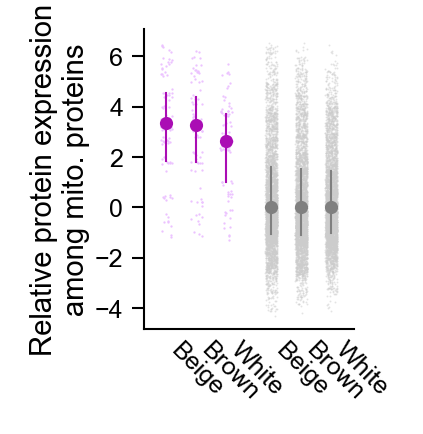

<Figure size 640x480 with 0 Axes>

In [ ]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [0.7]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


ax = fig.add_subplot(grid[0,0])

for i, data in enumerate(plot_data):
    ax.scatter(x_pos[i], np.median(data),
                s=10,
                c=point_color_list[i],
                lw=0, 
                zorder=3)
    ax.plot([x_pos[i], x_pos[i]], 
            [np.quantile(data, 0.25), np.quantile(data, 0.75)],
            color=point_color_list[i], 
            lw=0.5)

for x, values, c, s, raster in zip(x_pos, plot_data, sct_color_list, [0.3,0.3,0.3, 0.2,0.2,0.2], [False,False,False, True,True,True]):
    strip_plot(x=x, y=values, 
               width=0.4, s=s, c=c, lw=0, 
               ax=ax, rasterized=raster)


ax.set_xlim(x_pos[0]-0.5-group_gap/2, x_pos[-1]+0.5+group_gap/2)
# ax.set_ylim(-1, 4)
ax.set_xticks(x_pos)
# ax.set_yticks([-1, 0, 4])
ax.set_xticklabels(celltypes*len(Genesets), rotation=-45, ha='left')
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=2)

ax.set_xlabel('')
ax.set_ylabel('Relative protein expression\namong mito. proteins', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('Martinez-mito_TCA-PTexp_strip-point.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [13]:
[len(plot_data[i]) for i in range(len(plot_data))]

[90, 90, 90, 3530, 3530, 3530]

In [12]:
from scipy.stats import ks_2samp

print(ks_2samp(plot_data[0], plot_data[2])) # Beige vs White
print(ks_2samp(plot_data[0], plot_data[1])) # Beige vs Brown
print(ks_2samp(plot_data[1], plot_data[2]), '\n') # Brown vs White

KstestResult(statistic=0.26666666666666666, pvalue=0.003188492827630967)
KstestResult(statistic=0.08888888888888889, pvalue=0.871900195954173)
KstestResult(statistic=0.2777777777777778, pvalue=0.0018299176250191355) 

